In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('cancer_prediction_dataset.xlsx')
df.head()

,Age,Gender,RBC_Count,WBC_Count,Hemoglobin,Platelet_Count,MCV,MCH,MCHC,Lymphocytes,Neutrophils,Eosinophils,Basophils,Monocytes,CRP,Cancer_Present
0,58,Female,5.595822,10.609865,14.158166,275.637996,96.088744,27.339514,31.837455,33.461843,66.203222,3.790496,0.840190,2.544325,0.666598,0
1,71,Male,4.671733,7.319500,12.669048,228.047337,85.575197,29.243526,31.736378,36.487009,58.593467,2.582764,0.148128,3.576173,9.985608,0
2,48,Male,4.537049,10.034299,12.851674,369.246289,84.214099,32.666691,35.865384,27.939843,64.997199,1.776713,0.994548,7.248596,0.248172,0
3,34,Female,4.183518,9.911846,12.997385,444.389127,99.148960,30.850406,34.796463,23.126339,68.260829,1.158480,0.214026,2.773416,8.352441,1
4,62,Male,3.640939,6.233703,16.219668,226.959019,80.177266,31.028875,35.838807,34.759019,61.442459,3.178255,0.709020,6.319981,3.653668,0


In [3]:
df['Cancer_Present'].value_counts()

,count
Cancer_Present,
0,426
1,74


In [8]:
from imblearn.over_sampling import SMOTE

In [5]:
LE = LabelEncoder()

df['Gender'] = LE.fit_transform(df['Gender'])

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X_reampled, y_reampled = SMOTE(random_state=42).fit_resample(X,y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_reampled, y_reampled, test_size=0.33, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree_model = DecisionTreeClassifier(max_depth = 5)

In [24]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.4431818181818182, 0.9166666666666666, 'x[1] <= 0.5\ngini = 0.5\nsamples = 570\nvalue = [276, 294]'),
 Text(0.1590909090909091, 0.75, 'x[4] <= 11.916\ngini = 0.475\nsamples = 352\nvalue = [137, 215]'),
 Text(0.30113636363636365, 0.8333333333333333, 'True  '),
 Text(0.045454545454545456, 0.5833333333333334, 'x[0] <= 71.5\ngini = 0.353\nsamples = 35\nvalue = [27, 8]'),
 Text(0.022727272727272728, 0.4166666666666667, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.06818181818181818, 0.4166666666666667, 'x[10] <= 65.09\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.045454545454545456, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2727272727272727, 0.5833333333333334, 'x[12] <= 1.194\ngini = 0.453\nsamples = 317\nvalue = [110.0, 207.0]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[9] <= 22.323\ngini = 0.409\nsamples = 269\nvalue = [77, 192]'),
 Text(0.13636363636363635, 0.25,

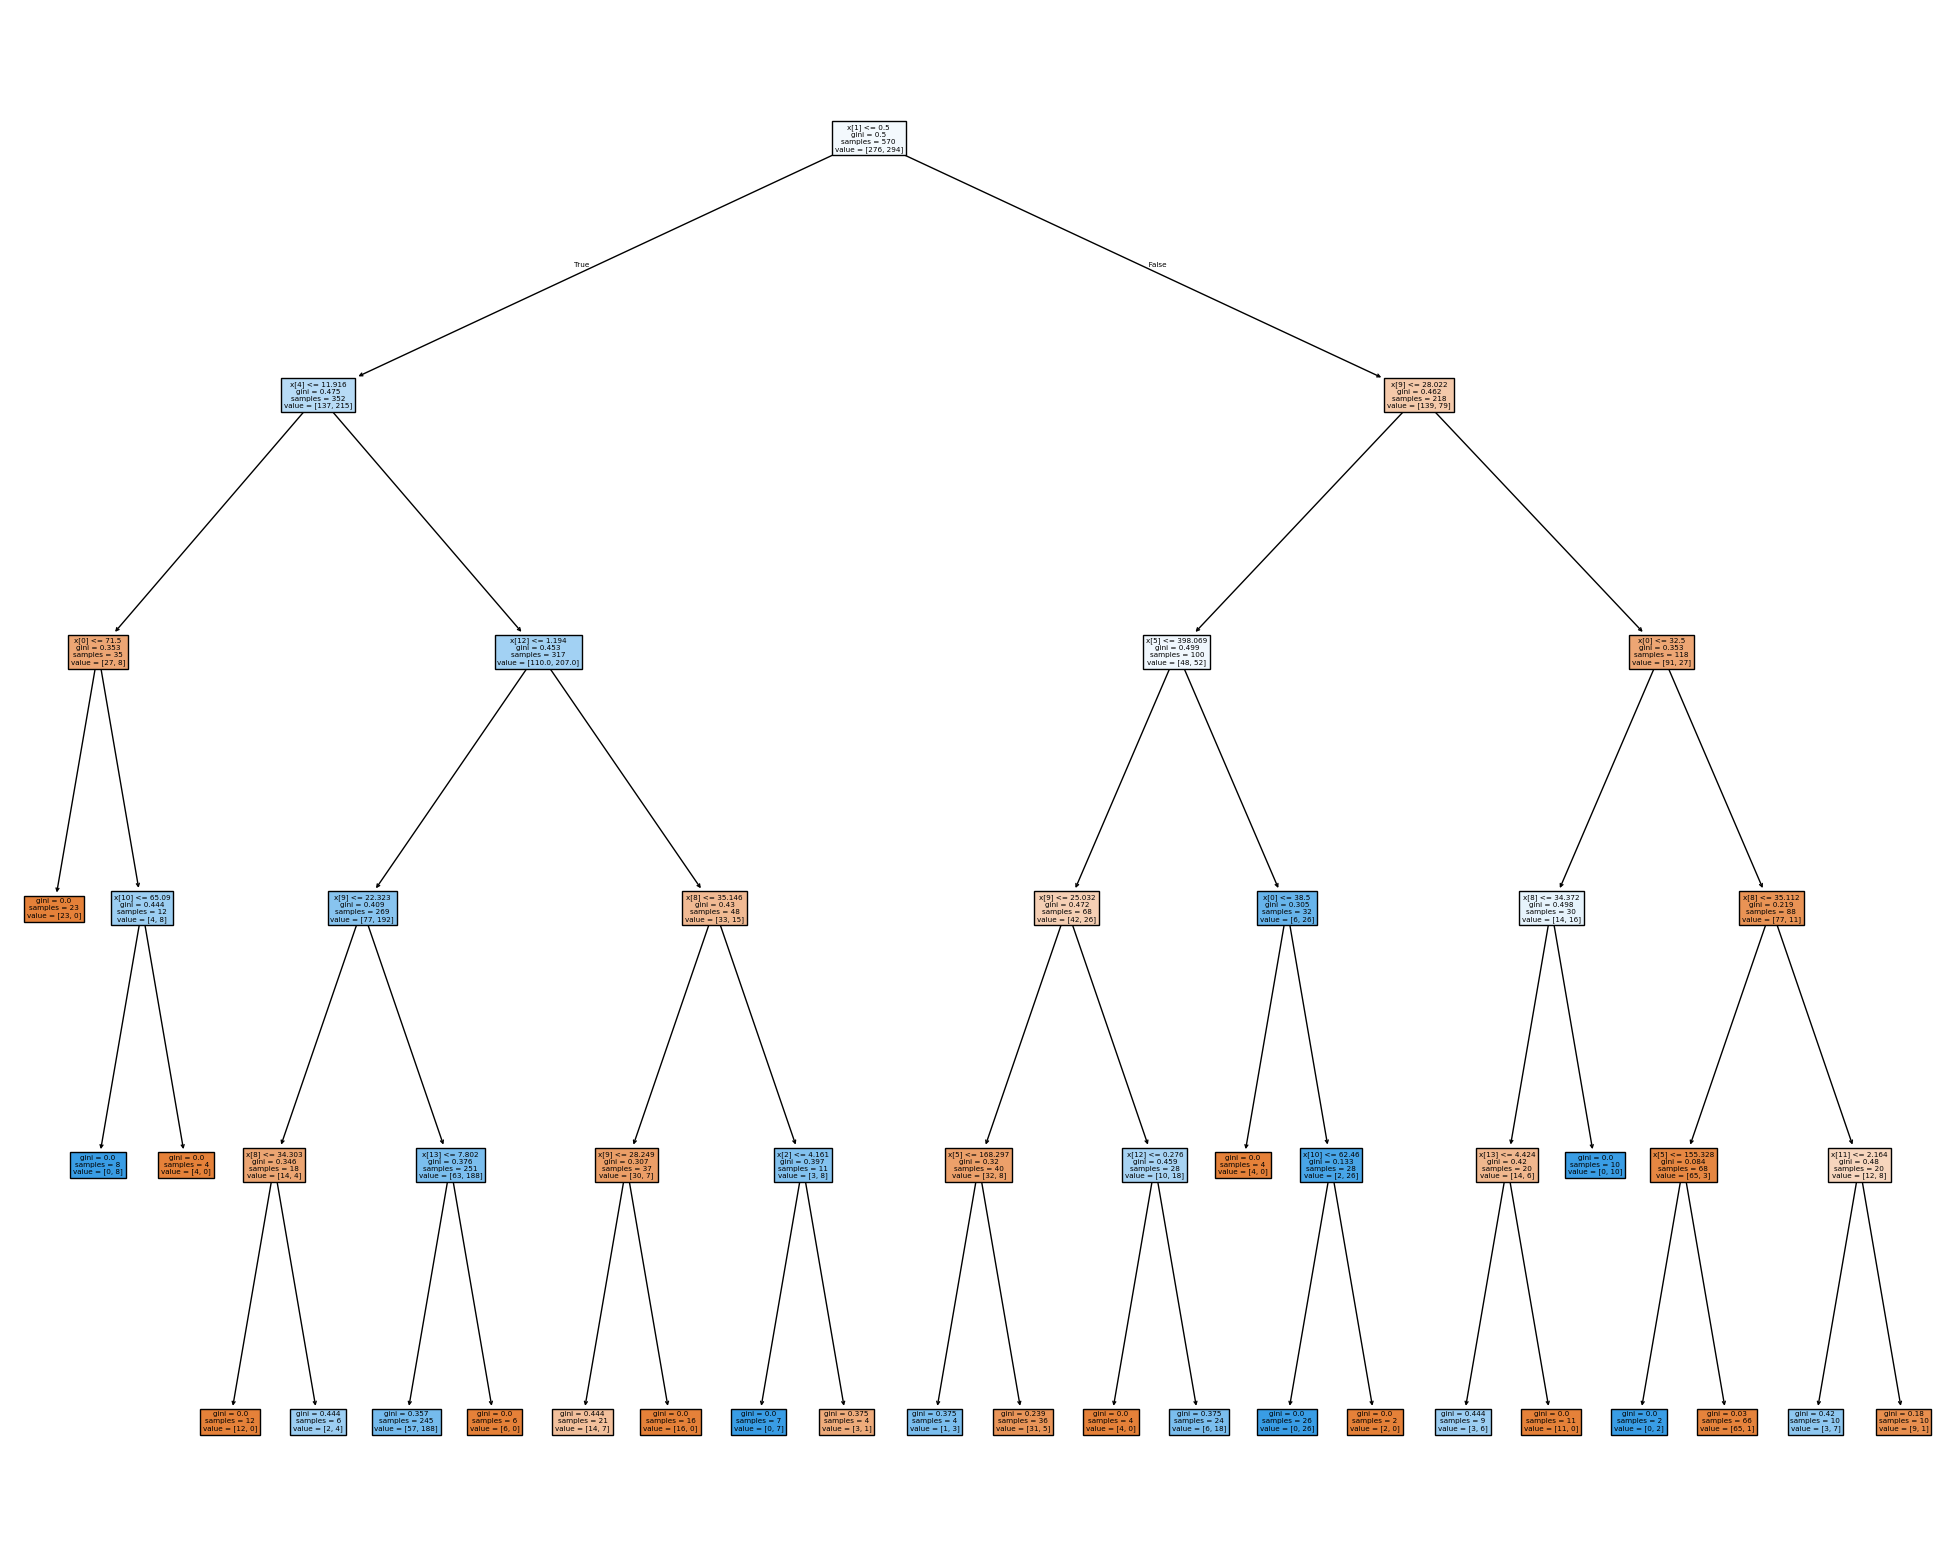

In [25]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(tree_model, filled=True)

In [26]:
# Prediction
y_pred = tree_model.predict(X_test)

In [27]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
score = accuracy_score(y_test, y_pred)
score

0.6843971631205674

In [29]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.55      0.65       150
           1       0.62      0.84      0.71       132

    accuracy                           0.68       282
   macro avg       0.71      0.69      0.68       282
weighted avg       0.71      0.68      0.68       282



In [30]:
con_matrix = confusion_matrix(y_test, y_pred)
print(con_matrix)

[[ 82  68]
 [ 21 111]]
